<a href="https://colab.research.google.com/github/JihoonPark99/NLP_study/blob/main/_6_%ED%86%A0%ED%94%BD_%EB%AA%A8%EB%8D%B8%EB%A7%81(Topic_Modeling).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 토픽 모델링(Topic Modeling)

* 토픽 모델링은 문서 집합에서 주제를 찾아내기 위한 기술
* 토픽 모델링은 '특정 주제에 관한 문서에서는 특정 단어가 자주 등장할 것이다'라는 직관을 기반
* 예를 들어, 주제가 '개'인 문서에서는 개의 품종, 개의 특성을 나타내는 단어가 다른 문서에 비해 많이 등장
* 주로 사용되는 토픽 모델링 방법은 잠재 의미 분석과 잠재 디리클레 할당 기법이 있음

## 잠재 의미 분석(Latent Semantic Analysis)

* 잠재 의미 분석(LSA)은 주로 문서 색인의 의미 검색에 사용
* 잠재 의미 인덱싱(Latent Semantic Indexing, LSI)로도 알려져 있음
* LSA의 목표는 문서와 단어의 기반이 되는 잠재적인 토픽을 발견하는 것
* 잠재적인 토픽은 문서에 있는 단어들의 분포를 주도한다고 가정

* LSA 방법
  + 문서 모음에서 생성한 문서-단어 행렬(Document Term Matrix)에서 단어-토픽 행렬(Term-Topic Matrix)과 토픽-중요도 행렬(Topic-Importance Matrix), 그리고 토픽-문서 행렬(Topic-Document Matrix)로 분해

## 잠재 디리클레 할당(Latent Dirichlet Allocation)

* 잠재 디레클레 할당(LDA)은 대표적인 토픽 모델링  알고리즘 중 하나

* 잠재 디레클레 할당 방법
  1. 사용자가 토픽이 개수를 지정해 알고리즘에 전달
  2. 모든 단어들을 토픽 중 하나에 할당
  3. 모든 문서의 모든 단어에 대해 단어 w가 가정에 의거, $p(t|d)$, $p(w|t)$에 따라 토픽을 재할당, 이를 반복, 이 때 가정은 자신만이 잘못된 토픽에 할당되어 있고 다른 모든 단어는 올바른 토픽에 할당된다는 것을 의미    

* $p(t|d)$ - 문서 d의 단어들 중 토픽 t에 해당하는 비율
* 해당 문서의 자주 등장하는 다른 단어의 토픽이 해당 단어의 토픽이 될 가능성이 높음을 의미    

* $p(w|t)$- 단어 w를 가지고 있는 모든 문서들 중  토픽 t가 할당된 비율
* 다른 문서에서 단어 w에 많이 할당된 토픽이 해당 단어의 토픽이 될 가능성이 높음을 의미

## 데이터 준비

In [1]:
from sklearn.datasets import fetch_20newsgroups

dataset = fetch_20newsgroups(shuffle=True, random_state=1,
                             remove=('headers', 'footers', 'quotes'))
documents = dataset.data

print(len(documents))
documents[0]

11314


"Well i'm not sure about the story nad it did seem biased. What\nI disagree with is your statement that the U.S. Media is out to\nruin Israels reputation. That is rediculous. The U.S. media is\nthe most pro-israeli media in the world. Having lived in Europe\nI realize that incidences such as the one described in the\nletter have occured. The U.S. media as a whole seem to try to\nignore them. The U.S. is subsidizing Israels existance and the\nEuropeans are not (at least not to the same degree). So I think\nthat might be a reason they report more clearly on the\natrocities.\n\tWhat is a shame is that in Austria, daily reports of\nthe inhuman acts commited by Israeli soldiers and the blessing\nreceived from the Government makes some of the Holocaust guilt\ngo away. After all, look how the Jews are treating other races\nwhen they got power. It is unfortunate.\n"

전처리가 필요함함

In [2]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.parsing.preprocessing import preprocess_string

nltk.download('stopwords')

def clean_test(d):
  pattern = r'[^a-zA-Z\s]'  #알파벳만 가져오기기
  test = re.sub(pattern, '', d)  #패턴에 해당하는거 삭제제
  return d

def clean_stopword(d):
  stop_words = stopwords.words('english')
  return ' '.join([w.lower() for w in d.split() if w not in stop_words and len(w) > 3])

## stopwords에 있는거 버리고,
## w길이가 3미만인거 버리고
## w를 소문자로 만들어서 가져오기


def preprocessing(d):
  return preprocess_string(d) #토큰화도 같이 된다. 


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
import pandas as pd

new_df = pd.DataFrame({'article' : documents})
new_df[:5]

,article
0,Well i'm not sure about the story nad it did s...
1,"\n\n\n\n\n\n\nYeah, do you expect people to re..."
2,Although I realize that principle is not one o...
3,Notwithstanding all the legitimate fuss about ...
4,"Well, I will have to change the scoring on my ..."


In [4]:
new_df.replace("",float("NaN"), inplace=True)
new_df.dropna(inplace=True)
print(len(new_df))

11096


개수가 많이 줄은걸 알 수 있다.

In [8]:
##우리가 만든 전처리 함수 적용
new_df['article'] = new_df['article'].apply(clean_test)

new_df['article'] = new_df['article'].apply(clean_stopword)
new_df['article'][:5]


0    well sure story seem biased. disagree statemen...
1    yeah, expect people read faq, etc. actually ac...
2    although realize principle strongest points, w...
3    notwithstanding legitimate fuss proposal, much...
4    well, change scoring playoff pool. unfortunate...
Name: article, dtype: object

In [9]:
tokenized_news = new_df['article'].apply(preprocessing)
tokenized_news[:5]

0    [sure, stori, bias, disagre, statement, media,...
1    [yeah, expect, peopl, read, faq, actual, accep...
2    [realiz, principl, strongest, point, like, kno...
3    [notwithstand, legitim, fuss, propos, chang, a...
4    [chang, score, playoff, pool, unfortun, time, ...
Name: article, dtype: object

In [10]:
tokenized_news = tokenized_news.to_list()
tokenized_news[:5]

[['sure',
  'stori',
  'bias',
  'disagre',
  'statement',
  'media',
  'ruin',
  'israel',
  'reput',
  'redicul',
  'media',
  'pro',
  'isra',
  'media',
  'world',
  'live',
  'europ',
  'realiz',
  'incid',
  'describ',
  'letter',
  'occur',
  'media',
  'ignor',
  'subsid',
  'israel',
  'exist',
  'european',
  'degre',
  'think',
  'reason',
  'report',
  'clearli',
  'atroc',
  'shame',
  'austria',
  'daili',
  'report',
  'inhuman',
  'act',
  'commit',
  'isra',
  'soldier',
  'bless',
  'receiv',
  'govern',
  'make',
  'holocaust',
  'guilt',
  'awai',
  'look',
  'jew',
  'treat',
  'race',
  'power',
  'unfortun'],
 ['yeah',
  'expect',
  'peopl',
  'read',
  'faq',
  'actual',
  'accept',
  'hard',
  'atheism',
  'need',
  'littl',
  'leap',
  'faith',
  'jimmi',
  'logic',
  'run',
  'steam',
  'jim',
  'sorri',
  'piti',
  'jim',
  'sorri',
  'feel',
  'denial',
  'faith',
  'need',
  'pretend',
  'happili',
  'mayb',
  'start',
  'newsgroup',
  'alt',
  'atheist',


In [11]:
len(tokenized_news)

11096

In [12]:

import numpy as np

drop_news = [index for index, sentence in enumerate(tokenized_news) if len(sentence) <= 1]
news_text = np.delete(tokenized_news, drop_news, axis=0)
print(len(news_text))
print(drop_news[:5])

10936
[44, 51, 89, 254, 263]


/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:5030: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


In [13]:
print(drop_news[:5])

[44, 51, 89, 254, 263]


## Gensim을 이용한 토픽 모델링

In [14]:
from gensim import corpora

dictionary = corpora.Dictionary(news_text)
corpus = [dictionary.doc2bow(text) for text in news_text]
print(dictionary)
print(corpus[1]) ##bagofword형태로 바꿈꿈

Dictionary(52123 unique tokens: ['act', 'atroc', 'austria', 'awai', 'bias']...)
[(50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 2), (58, 1), (59, 1), (60, 1), (61, 2), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 2), (68, 3), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 2), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 2), (82, 1), (83, 1), (84, 1), (85, 1)]


corpus : 말뭉치치

### 잠재 의미 분석을 위한 `LsiModel`

In [15]:
from gensim.models import LsiModel
##LDA보다 빠름

lsi_model = LsiModel(corpus, num_topics=20, id2word=dictionary)
topics = lsi_model.print_topics()
topics

[(0,
  '0.994*"max" + 0.069*"giz" + 0.068*"bhj" + 0.025*"qax" + 0.015*"biz" + 0.014*"nrhj" + 0.014*"bxn" + 0.012*"nui" + 0.011*"ghj" + 0.011*"zei"'),
 (1,
  '0.381*"file" + 0.193*"program" + 0.169*"edu" + 0.162*"imag" + 0.130*"avail" + 0.126*"output" + 0.119*"includ" + 0.115*"inform" + 0.101*"pub" + 0.100*"time"'),
 (2,
  '-0.408*"file" + -0.335*"output" + -0.216*"entri" + 0.171*"peopl" + 0.153*"know" + -0.137*"onam" + -0.134*"program" + 0.131*"said" + -0.129*"printf" + -0.115*"char"'),
 (3,
  '0.249*"imag" + 0.226*"edu" + -0.214*"output" + -0.165*"peopl" + -0.157*"know" + -0.155*"entri" + -0.153*"said" + 0.153*"avail" + 0.142*"jpeg" + 0.124*"pub"'),
 (4,
  '0.549*"wire" + 0.223*"ground" + -0.214*"jpeg" + -0.213*"file" + -0.169*"imag" + 0.164*"circuit" + 0.157*"outlet" + 0.139*"connect" + 0.129*"subject" + 0.126*"neutral"'),
 (5,
  '0.400*"jpeg" + 0.345*"imag" + -0.276*"anonym" + 0.246*"wire" + -0.160*"privaci" + -0.156*"internet" + 0.151*"color" + -0.144*"post" + -0.125*"inform" + -0.

어떤 토픽개수를 가지는지 계산할 수 있음..

In [16]:
from gensim.models.coherencemodel import CoherenceModel

min_topics, max_topics = 20, 25
coherence_scores = []

for num_topics in range(min_topics, max_topics):
  model = LsiModel(corpus, num_topics = num_topics, id2word = dictionary)
  coherence = CoherenceModel(model = model,
                             texts = news_text,
                             dictionary = dictionary)
  coherence_scores.append(coherence.get_coherence())
print(coherence_scores)


[0.4728770110138353, 0.3899260791055553, 0.45623639675490923, 0.48997819176450574, 0.4515257410270845]


<ipython-input-17-8a541e3e5d08>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


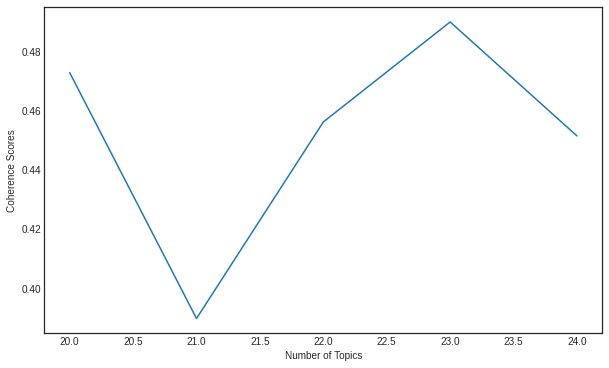

In [17]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

x = [i for i in range(min_topics, max_topics)]

plt.figure(figsize=(10,6))
plt.plot(x, coherence_scores)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Scores')
plt.show()

In [18]:
lsi_model = LsiModel(corpus, num_topics=24, id2word=dictionary)
topics = lsi_model.print_topics(num_topics=24)
topics

[(0,
  '-0.994*"max" + -0.069*"giz" + -0.068*"bhj" + -0.025*"qax" + -0.015*"biz" + -0.014*"nrhj" + -0.014*"bxn" + -0.012*"nui" + -0.011*"ghj" + -0.011*"zei"'),
 (1,
  '0.381*"file" + 0.193*"program" + 0.169*"edu" + 0.162*"imag" + 0.130*"avail" + 0.126*"output" + 0.119*"includ" + 0.115*"inform" + 0.101*"pub" + 0.100*"time"'),
 (2,
  '-0.408*"file" + -0.335*"output" + -0.216*"entri" + 0.171*"peopl" + 0.153*"know" + -0.137*"onam" + -0.134*"program" + 0.131*"said" + -0.129*"printf" + -0.115*"char"'),
 (3,
  '0.249*"imag" + 0.226*"edu" + -0.214*"output" + -0.165*"peopl" + -0.157*"know" + -0.155*"entri" + -0.153*"said" + 0.153*"avail" + 0.142*"jpeg" + 0.124*"pub"'),
 (4,
  '-0.549*"wire" + -0.223*"ground" + 0.214*"jpeg" + 0.213*"file" + 0.169*"imag" + -0.164*"circuit" + -0.157*"outlet" + -0.139*"connect" + -0.129*"subject" + -0.126*"neutral"'),
 (5,
  '0.400*"jpeg" + 0.345*"imag" + -0.276*"anonym" + 0.246*"wire" + -0.160*"privaci" + -0.156*"internet" + 0.151*"color" + -0.144*"post" + -0.125*

### 잠재 디리클레 할당을 위한 `LdaModel`

In [19]:
from gensim.models import LdaModel

lda_model = LdaModel(corpus, num_topics=20, id2word = dictionary)
topics = lda_model.print_topics()
topics

[(0,
  '0.017*"edu" + 0.009*"team" + 0.009*"player" + 0.008*"com" + 0.007*"year" + 0.007*"game" + 0.006*"run" + 0.006*"pitch" + 0.005*"good" + 0.004*"morri"'),
 (1,
  '0.010*"kei" + 0.006*"number" + 0.006*"server" + 0.006*"file" + 0.006*"encrypt" + 0.006*"post" + 0.006*"bit" + 0.006*"user" + 0.005*"anonym" + 0.005*"program"'),
 (2,
  '0.009*"like" + 0.006*"year" + 0.005*"good" + 0.005*"ride" + 0.004*"time" + 0.004*"bike" + 0.004*"peopl" + 0.004*"sell" + 0.003*"want" + 0.003*"smokeless"'),
 (3,
  '0.012*"peopl" + 0.006*"know" + 0.006*"time" + 0.005*"like" + 0.005*"said" + 0.004*"sai" + 0.004*"jesu" + 0.004*"thing" + 0.004*"live" + 0.004*"armenian"'),
 (4,
  '0.015*"israel" + 0.012*"isra" + 0.011*"jew" + 0.009*"arab" + 0.006*"palestinian" + 0.005*"peopl" + 0.005*"nazi" + 0.005*"report" + 0.004*"right" + 0.004*"coli"'),
 (5,
  '0.007*"book" + 0.007*"pictur" + 0.006*"sleev" + 0.005*"word" + 0.005*"hang" + 0.004*"greek" + 0.004*"time" + 0.004*"rockefel" + 0.004*"univers" + 0.004*"claim"'),


In [20]:
from gensim.models.coherencemodel import CoherenceModel

min_topics, max_topics = 20, 25
coherence_scores = []

for num_topic in range(min_topics, max_topics):
  model = LdaModel(corpus, num_topics = num_topic, id2word = dictionary)
  coherence = CoherenceModel(model = model,
                             texts = news_text,
                             dictionary = dictionary)
  coherence_scores.append(coherence.get_coherence())

print(coherence_scores)

[0.5097944481237259, 0.5572969595164249, 0.44384098965428703, 0.48069296919753435, 0.48301761863473053]


<ipython-input-21-8a541e3e5d08>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


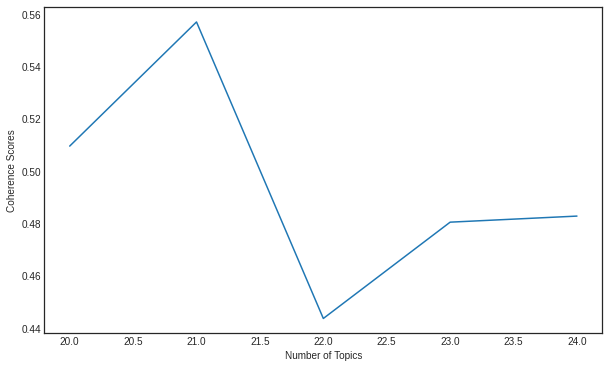

In [21]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

x = [i for i in range(min_topics, max_topics)]

plt.figure(figsize=(10,6))
plt.plot(x, coherence_scores)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Scores')
plt.show()

In [22]:
lda_model = LdaModel(corpus, num_topics = 23 ,id2word = dictionary)
topics = lda_model.print_topics(num_topics=23)
topics

[(0,
  '0.017*"edu" + 0.012*"scsi" + 0.009*"bike" + 0.006*"widget" + 0.006*"pitt" + 0.006*"soon" + 0.005*"gordon" + 0.005*"simm" + 0.005*"bank" + 0.005*"contrib"'),
 (1,
  '0.017*"plai" + 0.015*"game" + 0.014*"team" + 0.011*"year" + 0.011*"season" + 0.009*"goal" + 0.007*"score" + 0.006*"player" + 0.006*"period" + 0.005*"point"'),
 (2,
  '0.020*"window" + 0.015*"file" + 0.014*"drive" + 0.011*"disk" + 0.009*"work" + 0.008*"output" + 0.008*"card" + 0.008*"thank" + 0.007*"program" + 0.007*"problem"'),
 (3,
  '0.010*"file" + 0.009*"program" + 0.007*"avail" + 0.007*"inform" + 0.005*"user" + 0.005*"data" + 0.005*"entri" + 0.005*"imag" + 0.005*"includ" + 0.004*"mail"'),
 (4,
  '0.010*"ship" + 0.010*"sell" + 0.008*"condit" + 0.008*"edu" + 0.008*"price" + 0.006*"radar" + 0.006*"henrik" + 0.006*"detector" + 0.006*"ask" + 0.005*"sale"'),
 (5,
  '0.127*"max" + 0.017*"gun" + 0.009*"weapon" + 0.008*"giz" + 0.007*"crime" + 0.007*"firearm" + 0.007*"state" + 0.006*"amend" + 0.006*"crimin" + 0.006*"contr

## 토픽 모델링 시각화

In [23]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 35.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 KB 27.0 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.2.0 which is incompatible.


pyLDAvis.gensim -->> pyLDAvis.gensim_model

In [24]:
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

/usr/local/lib/python3.9/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
